# Credit Fraud Detection: Logistic Regression / SMOTE Oversampling

## Business Objective

Credit Fraud is a huge problem that we are all familiar with whether we have experienced it or not and a huge concern among consumers. There are huge uses cases for fraud detection algorithms as financial companies want to deliver the best service to their customers while reducing the costs and headaches associated with credit fraud on the backend. 
 This project seeks to develop a model that helps the financial industry predict whether a transaction is considered a fraud or not  based on anonymized transactional features. In addition, this problem brings an added challenge as it also involves the imbalanced class problem which is a common theme among machine learning research and literature. 

This is a supervised learning problem for Classification in which I will be utilizing a Logistic Regression Model and SMOTE Oversampling to predict fraudulent transactions. 

## Dataset Description/Project Motivations
##### Source- Kaggle
This dataset is titled Credit Card Fraud Detection and one of the most popular datasets on Kaggle. 
 * https://www.kaggle.com/mlg-ulb/creditcardfraud


"The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions."

I decided to undertake this project as I thought it would be interesting to be able to predict fraud with Machine Learning. I also wanted to further study oversampling and undersampling techniques like SMOTE with a practical example. 

## Evaluation Metric 
I always feel it is important to define an evaluation metric or success criteria at the beginning of a Machine Learning project to guide performance. In this project, predictions will be evaluated by the Area Under the Precision-Recall Curve (AUPRC) and namely the Recall score which tells us how many frauds we were able to successfully detect. Accuracy is not the best metric as this is an imbalanced classification problem. 

$$ Recall = \frac{TP}{TP + FN} $$ 

### Import Packages/Data
First, I will import all the required packages required for this notebook and import the credit card data to the cc data frame. 

In [1]:
## Basic Data Processing 
import numpy as np 
import pandas as pd 

##Data Visualization 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## SMOTE Oversampling 
from imblearn.over_sampling import SMOTE

## SKLearn Packages 
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

from sklearn.cross_validation import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hide Warnings 
import warnings 
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cc = pd.read_csv('creditcard.csv')

### Data Exploration
I will then explore the newly imported data to get a feel for its structure and data distributions. This can be easily accomplished with the describe(), head(), and info() functions from pandas. 

It looks like this dataset has 30 features used to predict whether a transaction is fraud or not. 

In [3]:
round(cc.describe(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [4]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

A quick plot with the hist function shows us how all the features are distributed. 

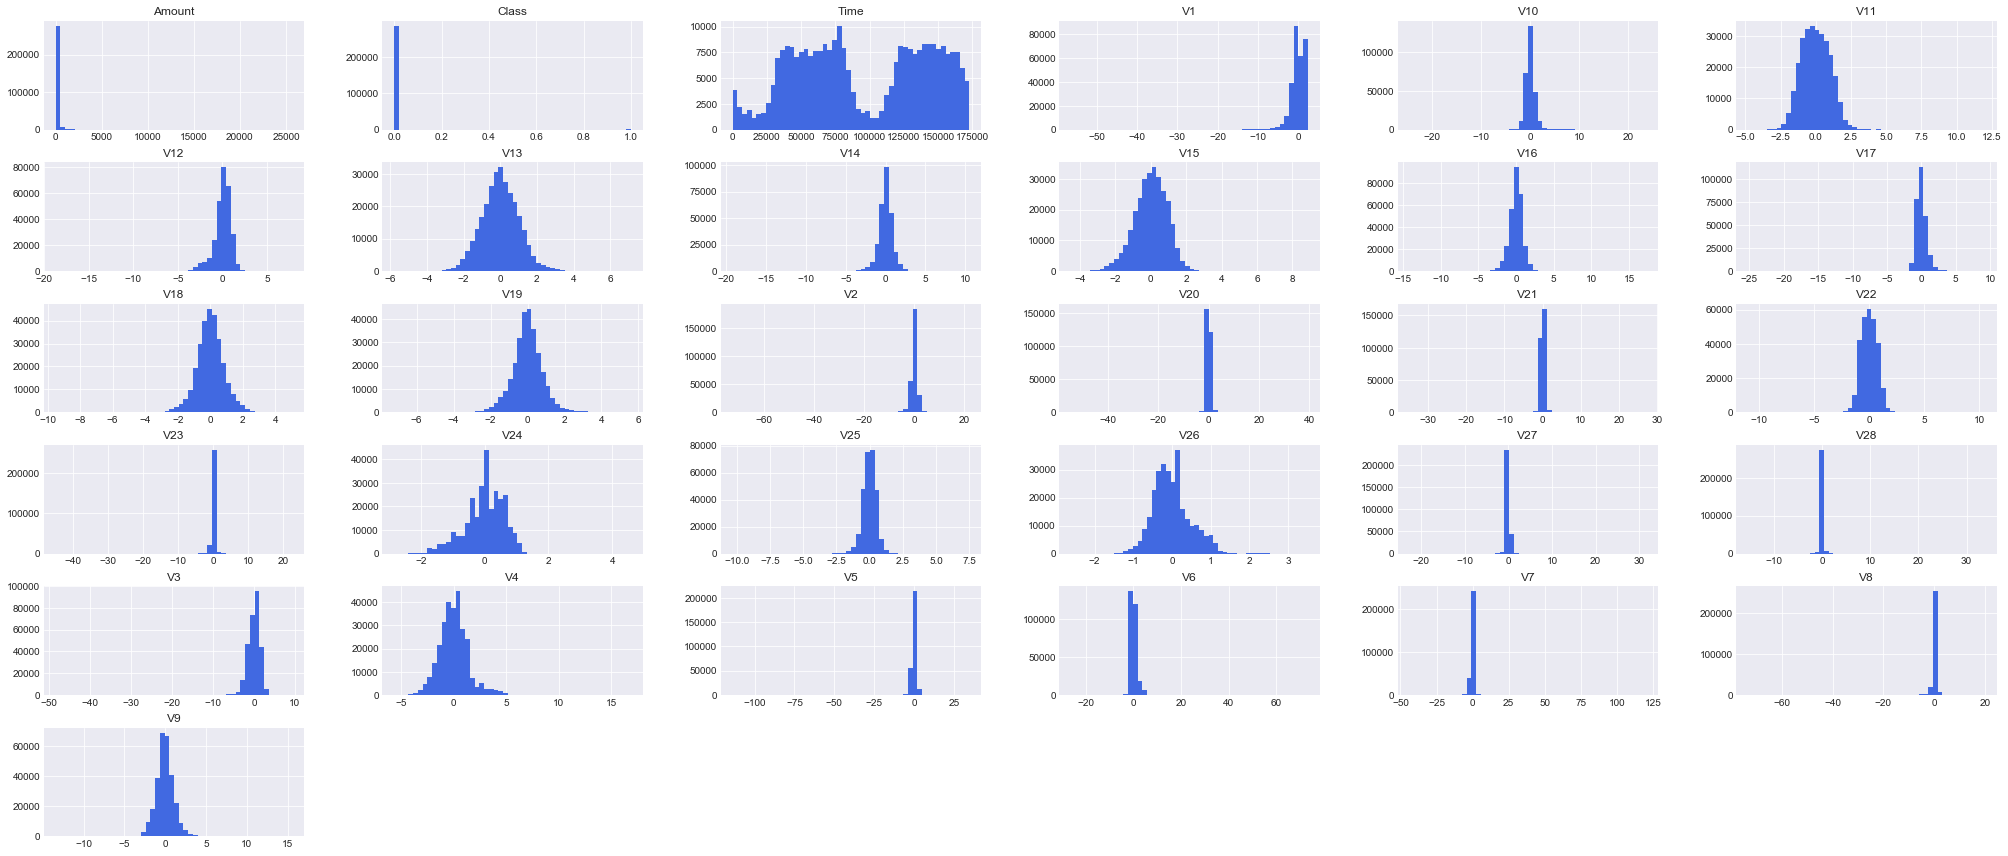

In [6]:
## Plot illustrates the distributions between all the features 
cc.hist(bins=50, figsize=(35,15), color = 'royalblue')
plt.show()

I also checked for nulls incase. Luckily this dataset is relatively clean and has no null values to fix.

In [7]:
## No nulls - no data cleaning needed 
cc.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

After looking at the dataset, it looks like the dataset has 284315 normal transactions and 492 Fraudulent Transactions which is around .00173 % of the dataset. This is truly an imbalanced classification problem! 

In [8]:
##Distribution of Transactions 
x= len(cc[cc["Class"]==0])
y= len(cc[cc["Class"]==1])

print('There are',x, 'Normal Transactions and',y,'Fraudulent Transactions.')
print(round(y/(x+y),5), 'transactions are fraudulent.')
print('Baseline Accuracy:' , round(x/(x+y),5),'%')

There are 284315 Normal Transactions and 492 Fraudulent Transactions.
0.00173 transactions are fraudulent.
Baseline Accuracy: 0.99827 %


### Split Training/Test Data 
It is important to first split the training and test sets to prevent any data leakage. I will be splitting the train/test set 80/20 in this project which is pretty typical in most ML projects. The train set will then be used to train the model while the test set will be used for our final hold out set to evaluate fraud detection ability on unseen data. 

In [9]:
train_set, test_set = train_test_split(cc, test_size = 0.2,random_state = 42)

### Feature Exploration/Selection 
In this section, I will explore the features and also remove some features where the distributions are very similar among both classes.

First, I will explore the Time and Amount features as they are the 2 un-anonymized features in the dataset. 

Nothing looks out of the ordinary for the distributions for Time and Amount for Fraud and Normal Transactions. 

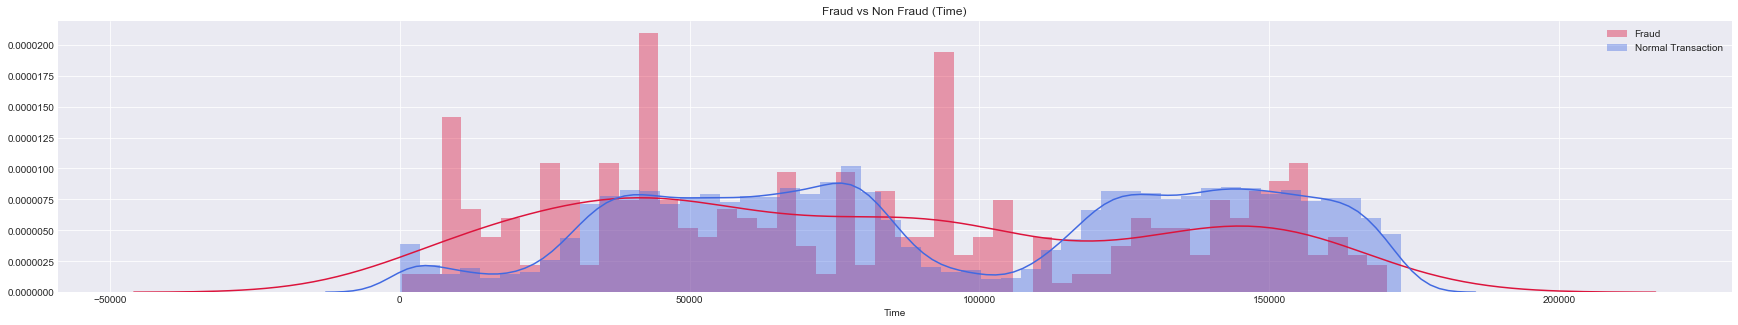

In [10]:
plt.subplots(figsize=(30, 5))
plt.title('Fraud vs Non Fraud (Time)')
graph1 = sns.distplot(train_set.Time[train_set.Class == 1],bins=50, color='crimson', label='Fraud')
graph2 = sns.distplot(train_set.Time[train_set.Class == 0],bins=50, color='royalblue',label='Normal Transaction')
plt.legend()

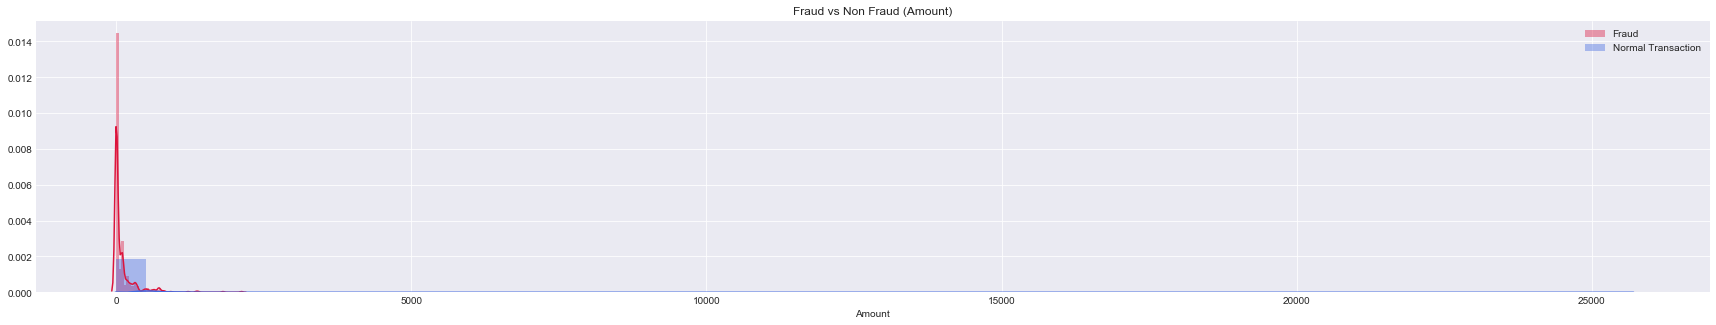

In [11]:
plt.subplots(figsize=(30, 5))
plt.title('Fraud vs Non Fraud (Amount)')
graph1 = sns.distplot(train_set.Amount[train_set.Class == 1],bins=50, color='crimson', label='Fraud')
graph2 = sns.distplot(train_set.Amount[train_set.Class == 0],bins=50, color='royalblue',label = 'Normal Transaction')
plt.legend()

### Feature Distributions
In the next section, I will visualize all of the anonymized feature distributions of the training set between Fraud and Non-Fraudulent transactions. I will then remove the features that have very similar distributions between both classes to help improve the model's predictive performance. 

In [12]:
#Select only the anonymized features.
cc_features = train_set.ix[:,1:29].columns

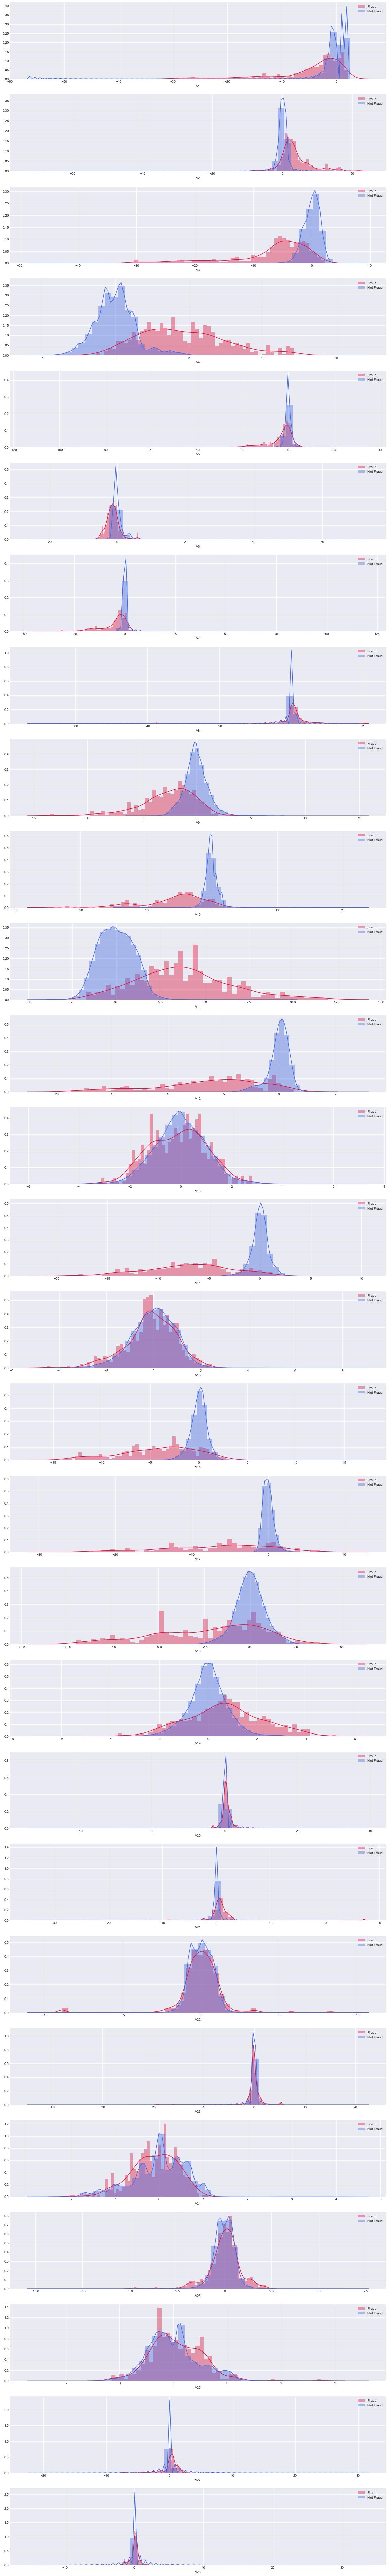

In [13]:
legend= ['Fraud','Not Fraud']
plt.figure(figsize=(20,28*5))
gs = gridspec.GridSpec(28, 1)
for i, col in enumerate(cc[cc_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(cc[col][cc.Class == 1],bins=50, color='crimson')
    sns.distplot(cc[col][cc.Class == 0],bins=50, color='royalblue')
    plt.legend(legend)

I decided to remove the below features based on similarity in their data distributions between the fraud and normal transactions. This feature removal is also performed on the test set as both datasets need to be identical in structure. 

In [14]:
## Drop Anonymized Features with similar distributions 
train_set = train_set.drop(['V1','V2','V5','V6','V7','V8','V9','V13','V15','V19','V20','V21','V22','V23','V24','V25','Time','Amount','V26','V27','V28'], axis=1)
test_set = test_set.drop(['V1','V2','V5','V6','V7','V8','V9','V13','V15','V19','V20','V21','V22','V23','V24','V25','Time','Amount','V26','V27','V28'], axis=1)

Performing the head function again shows our data is good to go. 

In [15]:
train_set.head()

,V3,V4,V10,V11,V12,V14,V16,V17,V18,Class
223361,-0.315013,0.330155,-0.030441,0.624996,1.691496,-0.253266,0.307252,-0.930844,0.651666,0
165061,1.555339,-2.017772,0.611115,-1.945070,-0.726597,-1.193347,-0.160123,-1.630444,2.106866,0
238186,-0.561351,-0.709897,-0.638222,0.521931,-0.072768,-0.640249,0.678131,0.044374,0.521919,0
150562,1.750679,2.769390,0.560595,-0.855437,-4.179628,1.271254,1.458600,-0.613260,0.814931,0
138452,-0.429786,-0.029571,1.221746,0.472626,1.595929,0.187685,0.143332,0.007803,-0.055817,0


Now, lets separate the X (predictive features) and y (target values) in the training and test set. This is important as an input to our Logistic Regression model. 

In [16]:
X_train = train_set.drop('Class',axis=1)
y_train = train_set['Class'].copy()

X_test = test_set.drop('Class',axis=1)
y_test = test_set['Class'].copy()

## Logistic Regression 
Its time for the funnest part of any Machine Learning project where we begin model building. I will first try a Logistic Regression out of the box to get a baseline on performance before performing SMOTE oversampling.

It is relatively easy to do thanks to a software library called sklearn which has many of the common machine learning algorithms available for model deployment. Creating a logistic regression model is as simple as assigning LogisticRegression() to a variable.

We can then "fit" this model to our data by using the variable's fit function and specifying the X (features), and y (target) data of the training dataset.

In [17]:
# Fitting Logistic Regression to the Training set
logclassifier = LogisticRegression()
logclassifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that the model has been fit the predict_proba function gives us the probability that a transaction in the training set is fraudulent. Lets discuss what I call thresholding and how one can modify a model's performance through the use of probabilities. 

The predict_proba() function allows us to predict the probability that an observation belongs to class 1. In this case, if the function returned .15 it would mean that there is a 15 % chance that the current observation is a fraudulent transaction based on our trained logistic regression model. We could then set a threshold for what we will classify to be class 1. Instead of a .5 threshold (predict function) we could say that anything with over .3 probability of being fraud should be classified as fraud. This allows greater customization of our model and would be especially useful if we really wanted to reduce our risk missing a fraud. 

In [18]:
y_predlog = logclassifier.predict_proba(X_train)

I can then plot the various thresholds with the below function to see how the precision and recall curves look for each probability threshold. 

Some people ask what is the difference between Precision and Recall. Usually in Machine Learning our goal is to optimize one metric so our model will often need to choose one main metric when working on Machine Learning problems. There is a fundamental tradeoff between Precision and Recall Scores. This means that as either Precision or Recall rises the other will usually decrease. It is important to keep this in mind when deciding which metrics to use. There are also some cases where you would prefer a higher Precision or higher Recall. In this case, I believe recall would be preferred as it tells us how many frauds we catch but we should also ensure that we are not flagging too many normal transactions as this may be annoying for customers. 

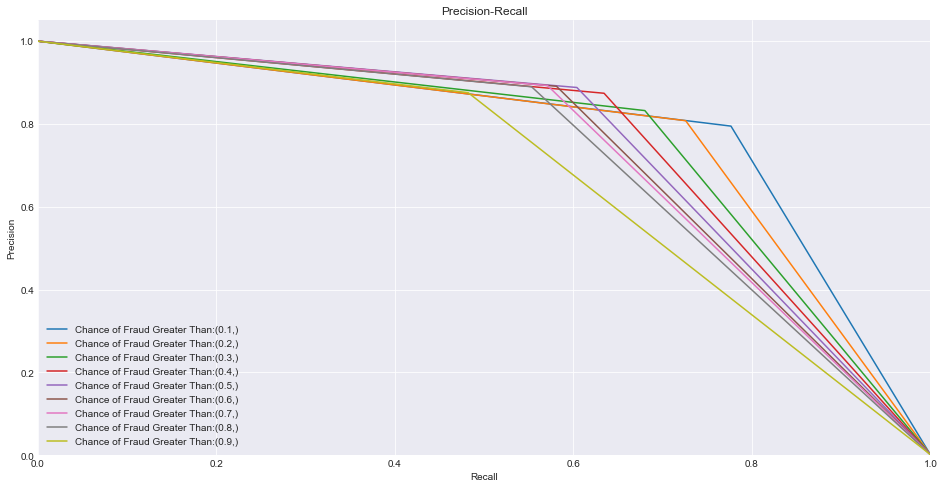

In [19]:
plt.figure(figsize=(16,8))
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_test_predictions_prob = y_predlog[:,1] > i
    precision, recall, thresholds = precision_recall_curve(y_train,y_test_predictions_prob)
    # Plot Precision-Recall curve
    Label = 'Chance of Fraud Greater Than:' + str(i) 
    plt.plot(recall, precision, label=Label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall')
    plt.legend(loc="lower left")   

The below function also prints the Recall Score, Precision Score, Average Precision Score, and Confusion Matrix for each probability threshold. This will be useful in the future when we need to evaluate our other models at various settings.

In [20]:
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_train_predictions = y_predlog[:,1] > i
    cnf_matrix = confusion_matrix(y_train,y_train_predictions)
    np.set_printoptions(precision=2)
    print('Threshold:', i)
    print('Recall Score:',recall_score(y_train, y_train_predictions))
    print('Precision Score:', precision_score(y_train, y_train_predictions))
    print('AVG Precision Score:', average_precision_score(y_train, y_train_predictions))
    print(cnf_matrix)
    print('-------------------------')

Threshold: (0.1,)
Recall Score: 0.7766497461928934
Precision Score: 0.7948051948051948
AVG Precision Score: 0.6176714802974551
[[227372     79]
 [    88    306]]
-------------------------
Threshold: (0.2,)
Recall Score: 0.7258883248730964
Precision Score: 0.807909604519774
AVG Precision Score: 0.586926155925499
[[227383     68]
 [   108    286]]
-------------------------
Threshold: (0.3,)
Recall Score: 0.6802030456852792
Precision Score: 0.8322981366459627
AVG Precision Score: 0.5666847349918135
[[227397     54]
 [   126    268]]
-------------------------
Threshold: (0.4,)
Recall Score: 0.6345177664974619
Precision Score: 0.8741258741258742
AVG Precision Score: 0.5552804058903306
[[227415     36]
 [   144    250]]
-------------------------
Threshold: (0.5,)
Recall Score: 0.6040609137055838
Precision Score: 0.8880597014925373
AVG Precision Score: 0.5371268306945577
[[227421     30]
 [   156    238]]
-------------------------
Threshold: (0.6,)
Recall Score: 0.5812182741116751
Precision S

## SMOTE Oversampling 
Now that we have some baseline scores. Lets see if we can improve these scores on the training set with SMOTE Oversampling. 

The original SMOTE Oversampling paper can be found at this link: 
https://arxiv.org/pdf/1106.1813.pdf

Standard Machine Learning Algorithms can become overwhelmed by the majority class negatively impacting their ability to generalize in class imbalance problems.

There are however four main methods for dealing with class imbalance depending on what phase of learning: 
* Changing Class Distributions 
* Feature Selection 
* Modifications within the Classifier itself
* Ensemble Learning Methods

SMOTE is a method that falls within the Changing Class Distributions category which means changing the nature of the data distribution by removing or creation of synthetic examples. 

SMOTE generates synthetic examples to over-sample the minority class, by generating instead of replicating data to avoid the overfitting problem.

Lets use SMOTE to create synthetic examples than train the model on the new data.  

In [21]:
sm = SMOTE(k_neighbors=5, kind='regular', m_neighbors=10, n_jobs=-1, out_step=0.5,ratio=1.0, random_state=42)
X_train_os, y_train_os = sm.fit_sample(X_train, y_train)

In [22]:
# Fitting Logistic Regression to the Training set
logclassifieros = LogisticRegression()
logclassifieros.fit(X_train_os, y_train_os)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Like previously we can get our models probability's of fraud by using the predict_proba function.

In [23]:
y_predlogos = logclassifieros.predict_proba(X_train)

After plotting the thresholds again we can clearly see that recall scores (ability to detect frauds) has improved. Now almost every probability threshold setting gets us around 90 % detection of frauds which is an excellent improvement. 

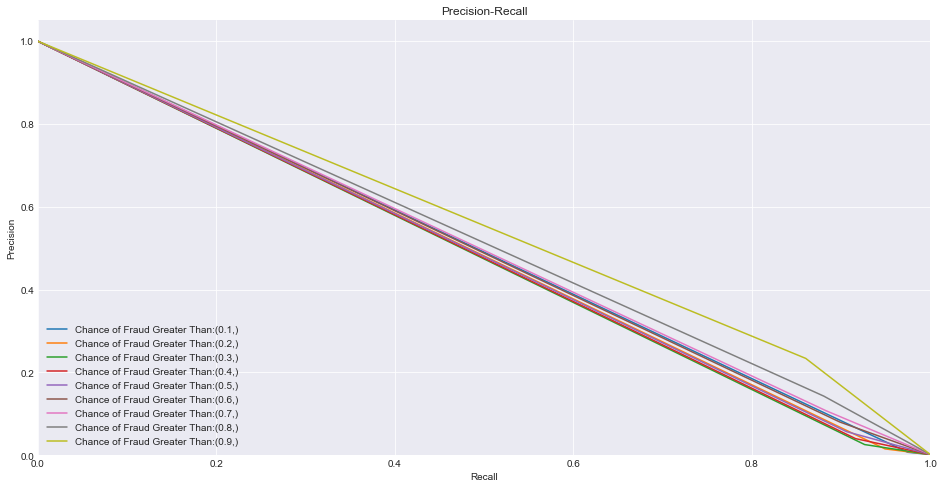

In [24]:
plt.figure(figsize=(16,8))
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_train_predictions_prob = y_predlogos[:,1] > i
    precision, recall, thresholds = precision_recall_curve(y_train,y_train_predictions_prob)
    # Plot Precision-Recall curve
    Label = 'Chance of Fraud Greater Than:' + str(i) 
    plt.plot(recall, precision, label=Label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall')
    plt.legend(loc="lower left") 

In [25]:
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_train_predictions = y_predlogos[:,1] > i
    cnf_matrix = confusion_matrix(y_train,y_train_predictions)
    np.set_printoptions(precision=2)
    print('Threshold:', i)
    print('Recall Score:',recall_score(y_train, y_train_predictions))
    print('Precision Score:', precision_score(y_train, y_train_predictions))
    print('AVG Precision Score:', average_precision_score(y_train, y_train_predictions))
    print(cnf_matrix)
    print('-------------------------')

Threshold: (0.1,)
Recall Score: 0.9746192893401016
Precision Score: 0.0073741214425625074
AVG Precision Score: 0.0072308504861314385
[[175761  51690]
 [    10    384]]
-------------------------
Threshold: (0.2,)
Recall Score: 0.949238578680203
Precision Score: 0.015443058881823436
AVG Precision Score: 0.01474692623600389
[[203607  23844]
 [    20    374]]
-------------------------
Threshold: (0.3,)
Recall Score: 0.9263959390862944
Precision Score: 0.025914093006744764
AVG Precision Score: 0.02413399003674622
[[213731  13720]
 [    29    365]]
-------------------------
Threshold: (0.4,)
Recall Score: 0.916243654822335
Precision Score: 0.04022284122562674
AVG Precision Score: 0.0369987583566095
[[218837   8614]
 [    33    361]]
-------------------------
Threshold: (0.5,)
Recall Score: 0.9060913705583756
Precision Score: 0.05714743076676805
AVG Precision Score: 0.05194318496656293
[[221561   5890]
 [    37    357]]
-------------------------
Threshold: (0.6,)
Recall Score: 0.8984771573604

## Hyperparameter Tuning 
This next section will attempt to tune our Logistic Regression model for optimal performance. Hyperparameter tuning is an important part of Machine Learning that I would equate to turning the knobs on an ML model to get the optimal settings. I'm hoping that through GridSearch (Exhaustive Search) I can find the optimal parameters for this Logistic Regression model and improve the recall score further.  

In [26]:
# Create the random grid
param_grid = [
  {'C': [.001,.01,.1,1, 10, 100, 1000], 'penalty':['l1', 'l2']}]
grid_searchlog = GridSearchCV(logclassifieros, param_grid, cv=5, 
                           scoring='recall')

Looks like our optimal model has the below parameter values for C and regularization penalty. 

In [27]:
grid_searchlog.fit(X_train_os,y_train_os)
grid_searchlog.best_params_

{'C': 10, 'penalty': 'l2'}

We can then create a new model that utilizes these best parameters and re-generate predictions. 

In [28]:
optimised_log_reg = grid_searchlog.best_estimator_
optimised_log_reg

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
y_predlogopt = optimised_log_reg.predict_proba(X_train)

Fraud Probability Thresholds for the training set and optimised model are printed again below. 

In [30]:
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_train_predictions = y_predlogopt[:,1] > i
    cnf_matrix = confusion_matrix(y_train,y_train_predictions)
    np.set_printoptions(precision=2)
    print('Threshold:', i)
    print('Recall Score:',recall_score(y_train, y_train_predictions))
    print('Precision Score:', precision_score(y_train, y_train_predictions))
    print('AVG Precision Score:', average_precision_score(y_train, y_train_predictions))
    print(cnf_matrix)
    print('-------------------------')

Threshold: (0.1,)
Recall Score: 0.9746192893401016
Precision Score: 0.007375396139441083
AVG Precision Score: 0.00723209283029736
[[175770  51681]
 [    10    384]]
-------------------------
Threshold: (0.2,)
Recall Score: 0.949238578680203
Precision Score: 0.015446247883368439
AVG Precision Score: 0.014749953359297878
[[203612  23839]
 [    20    374]]
-------------------------
Threshold: (0.3,)
Recall Score: 0.9263959390862944
Precision Score: 0.025917773201732587
AVG Precision Score: 0.024137399354437986
[[213733  13718]
 [    29    365]]
-------------------------
Threshold: (0.4,)
Recall Score: 0.916243654822335
Precision Score: 0.040227323378649434
AVG Precision Score: 0.03700286510087648
[[218838   8613]
 [    33    361]]
-------------------------
Threshold: (0.5,)
Recall Score: 0.9060913705583756
Precision Score: 0.05714743076676805
AVG Precision Score: 0.05194318496656293
[[221561   5890]
 [    37    357]]
-------------------------
Threshold: (0.6,)
Recall Score: 0.898477157360

## Test Set Evaluation
Now that we have our final model, lets see how our model performs on unseen test data. 

In [31]:
y_predtestlog = optimised_log_reg.predict_proba(X_test)

In [32]:
## If Chance of fraud is greater than 30 % then classify as Fraud 
y_test_predictions = y_predtestlog[:,1] >= .3
cnf_matrix2 = confusion_matrix(y_test,y_test_predictions)
print('Accuracy:',accuracy_score(y_test, y_test_predictions))
print('Recall',recall_score(y_test, y_test_predictions))
print('Precision',precision_score(y_test, y_test_predictions))
print('AUPRC', average_precision_score(y_test, y_test_predictions))
cnf_matrix2

Accuracy: 0.938871528387346
Recall 0.9285714285714286
Precision 0.025518788558609087
AUPRC 0.023818906890786064


array([[53389,  3475],
       [    7,    91]])

#### With a Logistic Regression Model that classifies any transaction with over 30 % chance of Fraud as Fraudulent we only missed 7/98 Frauds. 

* 92.8 Recall (Able to predict 92.8 % of frauds) 

Lets now compare this to the original model and see what difference we get. It seems with a threshold of 30 % chance of being fraud. Our OverSampling Model received a recall score of 92.8 % (Fraud Detection) and our original baseline could only detect 64.2 %. Great improvement through SMOTE oversampling. 

In [33]:
y_pred_original = logclassifier.predict_proba(X_test)

In [34]:
y_test_predictions = y_pred_original[:,1] >= .3
cnf_matrix2 = confusion_matrix(y_test,y_test_predictions)
print('Accuracy:',accuracy_score(y_test, y_test_predictions))
print('Recall',recall_score(y_test, y_test_predictions))
print('Precision',precision_score(y_test, y_test_predictions))
print('AUPRC', average_precision_score(y_test, y_test_predictions))
cnf_matrix2

Accuracy: 0.9991397773954567
Recall 0.6428571428571429
Precision 0.8181818181818182
AUPRC 0.5265884706915571


array([[56850,    14],
       [   35,    63]])

Lets now look at all prediction thresholds with the new model. As we can see our precision scores dropped a bit with oversampling but our Recall scores are much better. There is a tradeoff between how high we set the threshold and our precision/recall scores. This illustrates one of the many tradeoffs that exist in Machine Learning modeling. 

For Example- If we look at this from two different probability thresholds : 
* Threshold 1- Classify all transactions with 10 % or more chance of being fraud as fraud 
 * 96.9 % Fraud Detection 
 * 12976 Misclassified Normal Transaction 
 
This would get nearly all the frauds but be potentially frustrating for customers as many normal transactions will get flagged as fraud. 

* Threshold 2- Classify all transactions with 50 % chance or more of being fraud as fraud 
 * 90.8 % Fraud Detection 
 * 1463 Misclassified Normal Transaction 
Around 10 % of frauds would be missed but alot less normal transactions would be missclassified.  

Although each Threshold is different it is important to have a high recall score and also find a balance that does not misclassify to many normal transactions.

In [35]:
thresholds = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for i in zip(thresholds):
    y_test_predictions = y_predtestlog[:,1] > i
    cnf_matrix = confusion_matrix(y_test,y_test_predictions)
    print('Threshold:', i)
    print('Recall Score:',recall_score(y_test,y_test_predictions))
    print('Precision Score:', precision_score(y_test,y_test_predictions))
    print('AVG Precision Score:', average_precision_score(y_test,y_test_predictions))
    print(cnf_matrix)
    print('-------------------------')

Threshold: (0.1,)
Recall Score: 0.9693877551020408
Precision Score: 0.007291986490635554
AVG Precision Score: 0.0071214291044656925
[[43931 12933]
 [    3    95]]
-------------------------
Threshold: (0.2,)
Recall Score: 0.9285714285714286
Precision Score: 0.015026420079260238
AVG Precision Score: 0.014075993302819275
[[50899  5965]
 [    7    91]]
-------------------------
Threshold: (0.3,)
Recall Score: 0.9285714285714286
Precision Score: 0.025518788558609087
AVG Precision Score: 0.023818906890786064
[[53389  3475]
 [    7    91]]
-------------------------
Threshold: (0.4,)
Recall Score: 0.9183673469387755
Precision Score: 0.040964952207555756
AVG Precision Score: 0.03776131898319094
[[54757  2107]
 [    8    90]]
-------------------------
Threshold: (0.5,)
Recall Score: 0.9081632653061225
Precision Score: 0.05727155727155727
AVG Precision Score: 0.0521699245311263
[[55399  1465]
 [    9    89]]
-------------------------
Threshold: (0.6,)
Recall Score: 0.9081632653061225
Precision Sc

### Conclusion

This was an interesting exercise in Fraud Detection with Logistic Regression and SMOTE oversampling.

Some key benefits to using Logistic Regression from a business perspective include: 
* Simple Interpretation - Many companies use Logistic Regression still for classification as it can be easily explained. Sometimes explainability is more important than model performance.
* Probabilistic Approach- Since Logistic Regression returns a probability you can see how significant a prediction is.

I look forward to possibly using this dataset with other Machine Learning models to see if I can get even better predictive performance. 92.8 % Fraud Detection is pretty good considering how challenging Frauds are to detect in real life and would likely be of value to any financial institution.